In [7]:
import warnings 
warnings.filterwarnings('ignore')

# basic libraries
import os
import numpy as np
import pandas as pd
import re
import string
from collections import Counter
import time

#visulaization modules
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

%matplotlib inline


## <font color = red> NHẬN XÉT: </font>
- Categorical Features: gender, ever_married, work_type, Residence_type, smoking_status 
- Binary Numerical Features: hypertension,heart_disease, stroke
- Continous Numerical Features: age, avg_glucose_level, bmi


 <font color = red> **Dữ liệu thiếu ở cả 2 loại thuộc tính:** </font> 

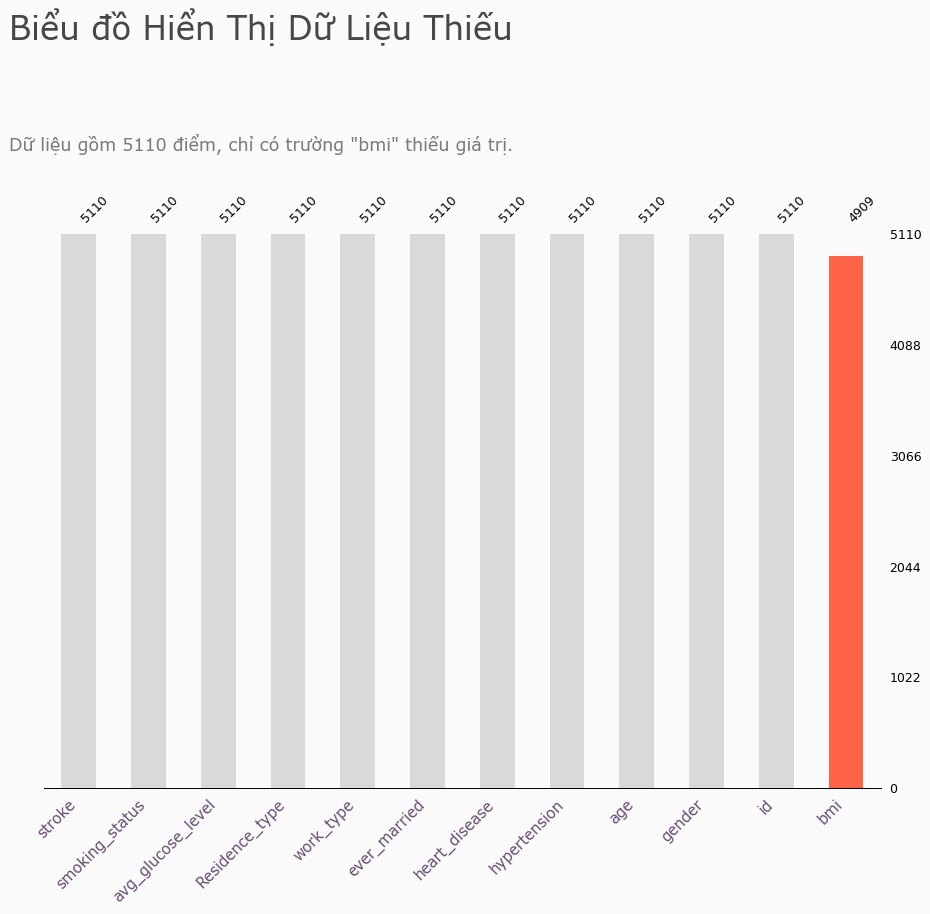

In [12]:
# Load your dataset
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
color = ['#d9d9d9', '#d9d9d9', '#d9d9d9', '#d9d9d9', '#d9d9d9', '#d9d9d9', '#d9d9d9', '#d9d9d9', '#d9d9d9', '#d9d9d9', '#d9d9d9', '#ff6347']

# Tạo biểu đồ với các cài đặt mới
fig, ax = plt.subplots(figsize=(12, 8), dpi=90)
fig.patch.set_facecolor('#fafafa')
ax.set_facecolor('#fafafa')

# Vẽ biểu đồ Nullity của dataset
msno.bar(df, sort='descending',  color=color, ax=ax, fontsize=10,  labels='off', filter='top')

# Thêm tiêu đề và chú thích bằng tiếng Việt
ax.text(-1, 1.35, 'Biểu đồ Hiển Thị Dữ Liệu Thiếu', {'font': 'Verdana', 'size': 26, 'color': '#333333'}, alpha=0.9)

ax.text(-1, 1.15, 'Dữ liệu gồm 5110 điểm, chỉ có trường "bmi" thiếu giá trị.', {'font': 'Verdana', 'size': 14, 'color': '#444444'}, alpha=0.7)

# Điều chỉnh nhãn trục x để dễ đọc hơn
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,  ha='right', **{'font': 'Verdana', 'size': 12, 'weight': 'light', 'color': '#6a4e76'}, alpha=1)
# Ẩn nhãn trục y
ax.set_yticklabels('')
# Hiển thị đường viền dưới trục x
ax.spines['bottom'].set_visible(True)
# Hiển thị biểu đồ
fig.show()

## <font color = red> CÂU 1: </font> 
- With each numerical column, how are values distributed? 
- What is the percentage of missing values? 
- Min? max? Are they abnormal? 

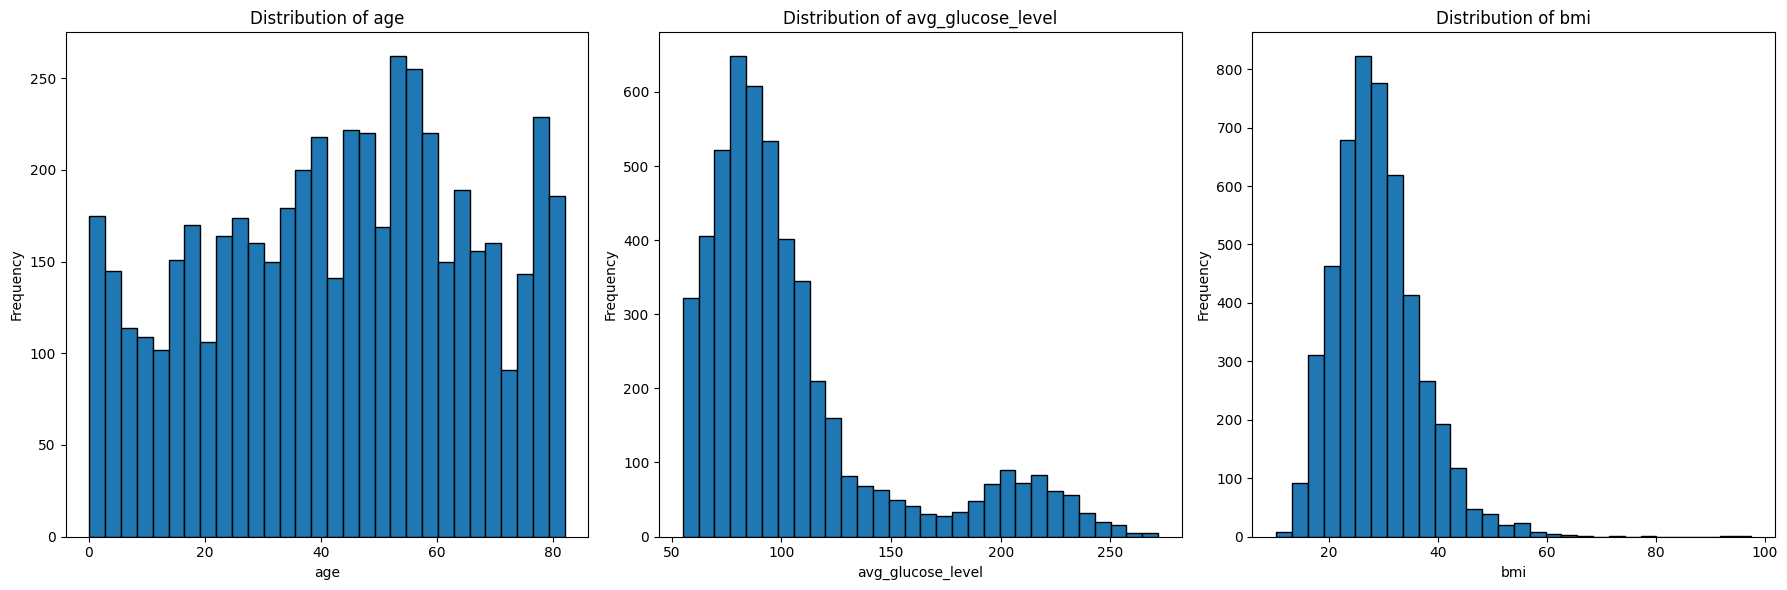

Numerical Features Analysis:
              Column  Missing Percentage (%)  Min Value  Max Value  \
0                age                    0.00       0.08      82.00   
1  avg_glucose_level                    0.00      55.12     271.74   
2                bmi                    3.93      10.30      97.60   

                                     Abnormal Values  
0                                                 []  
1                                                 []  
2  [60.9, 64.8, 60.2, 71.9, 78.0, 66.8, 97.6, 63....  


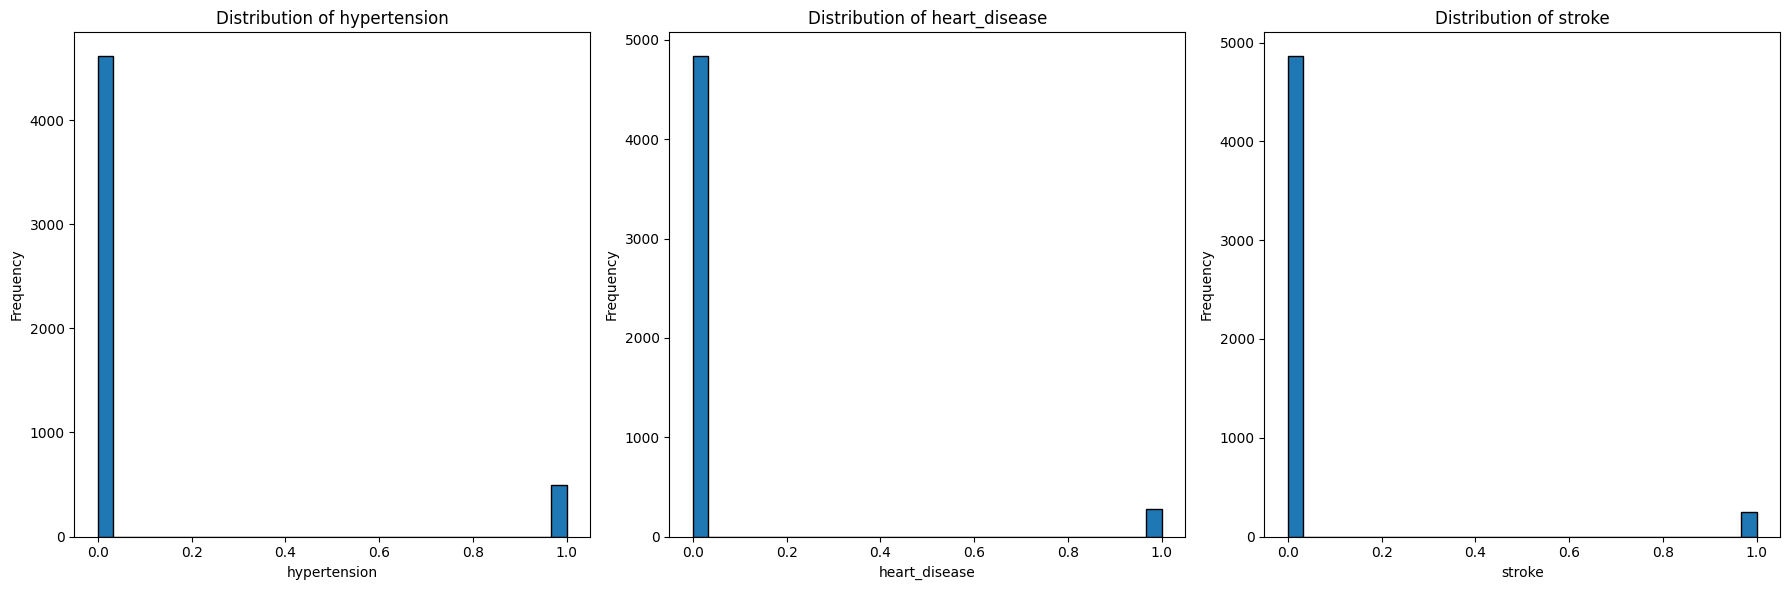


Binary Numerical Features Analysis:
          Column  Missing Percentage (%)  Min Value  Max Value Abnormal Values
0   hypertension                     0.0          0          1              []
1  heart_disease                     0.0          0          1              []
2         stroke                     0.0          0          1              []


In [13]:
# Replace with the names of your numerical and binary numerical columns
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
binary_numerical_columns = ['hypertension', 'heart_disease', 'stroke']

# Function to calculate distribution and missing values for numerical columns
def analyze_numerical_features(df, numerical_columns):
    analysis = []

    # Create a single row of subplots (3 columns for the 3 histograms)
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for i, col in enumerate(numerical_columns):
        col_data = df[col]
        missing_percentage = col_data.isnull().mean() * 100
        col_min = col_data.min()
        col_max = col_data.max()
        mean = col_data.mean()
        std = col_data.std()
        median = col_data.median()
        abnormal_values = get_abnormal_values(col, col_data)

        # Store the analysis for each numerical column
        analysis.append({
            'Column': col,
            'Missing Percentage (%)': round(missing_percentage, 2),
            'Min Value': col_min,
            'Max Value': col_max,
            'Mean': round(mean, 2),
            'Std Dev': round(std, 2),
            'Median': median,
            'Abnormal Values': abnormal_values
        })
        
        # Plot distribution (histogram) for numerical columns in the corresponding subplot
        axes[i].hist(col_data, bins=30, edgecolor='black')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

    return pd.DataFrame(analysis)

# Function to check for abnormal values
def get_abnormal_values(column_name, col_data):
    if column_name == 'bmi':
        abnormal = col_data[(col_data < 0) | (col_data > 60)]
    else:
        abnormal = col_data[col_data < 0]
    return abnormal.tolist()

# Run the analysis for numerical columns
numerical_results = analyze_numerical_features(df, numerical_columns)
print("Numerical Features Analysis:")
print(numerical_results[['Column', 'Missing Percentage (%)', 'Min Value', 'Max Value','Abnormal Values']])

# Run the analysis for binary numerical columns
binary_results = analyze_numerical_features(df, binary_numerical_columns)
print("\nBinary Numerical Features Analysis:")
print(binary_results[['Column', 'Missing Percentage (%)', 'Min Value', 'Max Value', 'Abnormal Values']])


## <font color = red> CÂU 2: </font> 
- With each categorical column, how are values distributed?
- What is the percentage of missing values?
- How many different values? Show a few
- Are they abnormal? 

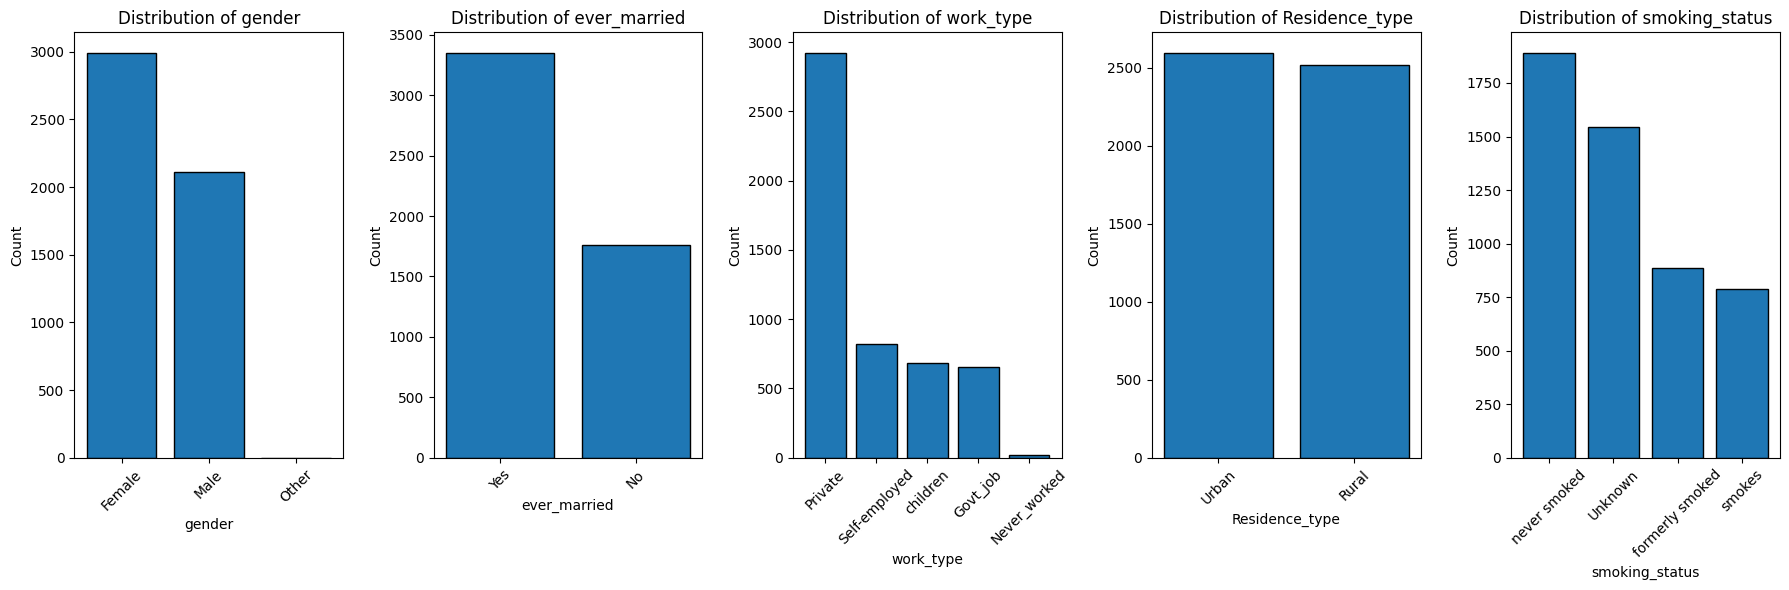


Categorical Features Analysis:
           Column  Missing Percentage (%)  Number of Unique Values  \
0          gender                     0.0                        3   
1    ever_married                     0.0                        2   
2       work_type                     0.0                        5   
3  Residence_type                     0.0                        2   
4  smoking_status                     0.0                        4   

                             Sample of Unique Values Abnormal Values  \
0                              [Male, Female, Other]              []   
1                                          [Yes, No]              []   
2  [Private, Self-employed, Govt_job, children, N...              []   
3                                     [Urban, Rural]              []   
4   [formerly smoked, never smoked, smokes, Unknown]              []   

                                    Distribution (%)  
0  {'Female': 58.590998043052835, 'Male': 41.3894...  
1  {

In [9]:


# Replace with the names of your categorical columns
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Function to analyze categorical features
def analyze_categorical_features(df, categorical_columns):
    analysis = []

    # Create a single row of subplots (5 columns for the 5 bar charts)
    fig, axes = plt.subplots(1,5, figsize=(18, 6))

    for i, col in enumerate(categorical_columns):
        col_data = df[col]
        missing_percentage = col_data.isnull().mean() * 100
        unique_values = col_data.unique().tolist()  # Get all unique values
        num_unique_values = len(unique_values)
        value_counts = col_data.value_counts().to_dict()
        abnormal_values = get_abnormal_categorical_values(col, col_data)

        # Show distribution (value counts and percentage)
        distribution = col_data.value_counts(normalize=True) * 100  # Percentage distribution

        analysis.append({
            'Column': col,
            'Missing Percentage (%)': round(missing_percentage, 2),
            'Number of Unique Values': num_unique_values,
            'Sample of Unique Values': unique_values[:5],  # Display all unique values
            'Abnormal Values': abnormal_values,
            'Distribution (%)': distribution.to_dict()  # Percentage distribution of categories
        })
        
        # Plot distribution (bar chart) for categorical columns in the corresponding subplot
        value_counts = col_data.value_counts()  # Get the count of each unique value
        axes[i].bar(value_counts.index.astype(str), value_counts.values, edgecolor='black')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

    return pd.DataFrame(analysis)

# Function to check for abnormal values in categorical columns
def get_abnormal_categorical_values(column_name, col_data):
    # Define known valid values for specific columns if needed
    known_valid_values = {
        'gender': ['Male', 'Female', 'Other'],
        'ever_married': ['Yes', 'No'],
        'work_type': ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
        'Residence_type': ['Urban', 'Rural'],
        'smoking_status': ['formerly smoked', 'never smoked', 'smokes', 'Unknown']
    }

    if column_name in known_valid_values:
        invalid_values = col_data[~col_data.isin(known_valid_values[column_name])]
        return invalid_values.unique().tolist()
    return []

# Run the analysis for categorical columns
categorical_results = analyze_categorical_features(df, categorical_columns)
print("\nCategorical Features Analysis:")
print(categorical_results[['Column', 'Missing Percentage (%)', 'Number of Unique Values', 'Sample of Unique Values', 'Abnormal Values', 'Distribution (%)']])
